In [28]:
#Cambiar a entorno virtual y cargar paquetes

import numpy as np
import pandas as pd
from pysyncon import Dataprep, Synth, AugSynth, PenalizedSynth
from pysyncon.utils import PlaceboTest
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display

In [29]:
data = pd.read_csv(r'C:\Users\34645\Desktop\Doctorado_II\Códigos_Python\IEDIS\Data\dataset_prueba.csv')
data['date'] = pd.to_datetime(data['date'])
# Describir serie temporal del movimiento en las provincias españolas 
data.set_index('date', inplace=True, drop=False)

In [30]:
#Set PANDAS to show all columns in DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [31]:
datos = data[['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline',
               'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline', 'Edad mediana de la población (años)', 'Esperanza de vida al nacer (Años)', 
               'Número medio de hijos por mujer (Número)', 'Número total de hogares (Número)', 'Población residente (Personas)', 'Proporción de empleo en industria (NACE Rev.2 B-E) (Porcentaje)',
                 'Proporción de empleo en servicios (NACE Rev.2 G-U) (Porcentaje)', 'Proporción de extranjeros sobre la población total (Porcentaje)', 
                 'Proporción de hogares de una persona sobre el total de hogares (Porcentaje)', 'Proporción de nacidos en el extranjero sobre la población total (Porcentaje)',
                   'Proporción de nacionales sobre la población total (Porcentaje)', 'Proporción de nativos nacionales sobre la población total (Porcentaje)',
                     'Proporción de niños de 0-4 años en guarderías sobre la población de 0-4 años (Porcentaje)', 'Proporción de ocupados entre 20-64 años sobre la población activa (Porcentaje)', 
                     'Proporción de población >=65 años (Porcentaje)', 'Proporción de población de  0-14 años (Porcentaje)', 'Proporción de población de 15-64 años (Porcentaje)', 
                     'Proporción de población entre 25-64 años con máximo nivel de educación ISCED 3 ó 4 (Porcentaje)', 
                     'Proporción de población entre 25-64 años con máximo nivel de educación ISCED 5 ó 6 (Porcentaje)',
                     'Proporción de población entre 25-64 años con máximo nivel educación ISCED 0, 1 ó 2 (Porcentaje)', 
                     'Renta neta media anual de los hogares (Euros)', 'Renta neta media anual por habitante (Euros)', 'Superficie total (Km2)', 'Tamaño medio de los hogares (Número)', 'Tasa bruta de mortalidad (Tanto por mil de personas)', 'Tasa bruta de natalidad (Tantos por mil de personas)', 'Tasa de actividad (Porcentaje)', 'Tasa de desempleo (Porcentaje)', 'Uso del suelo (%): Infraestructuras de transporte      ', 'Uso del suelo (%): Otras zonas artificiales      ', 'Uso del suelo (%): Tejido urbano residencial continuo', 'Uso del suelo (%): Tejido urbano residencial discontinuo', 'Uso del suelo (%): Unidades industriales, comerciales, públicas, militares y priva', 'Uso del suelo (%): Zonas agrícolas ', 'Uso del suelo (%): Zonas naturales      ', 'Uso del suelo (%): Zonas verdes urbanas, instalaciones deportivas y de ocio    ', 'Valor_Stringency', 'Valor_GovernmentResponseIndex', 'Valor_EconomicSupportIndex', 'Valor_Containment', 'trend_yearly']]
print ("# of variables in dataframe:", len(data.columns))

print  ("# of observations in dataframe:", len(data))

# of variables in dataframe: 79
# of observations in dataframe: 122711


In [32]:
np.round(datos.describe(), 2).T[['count','mean', 'std', 'min', 'max']]

,count,mean,std,min,max
retail_and_recreation_percent_change_from_baseline,122674.00,-23.80,24.38,-97.00,100.00
grocery_and_pharmacy_percent_change_from_baseline,121710.00,2.11,25.59,-96.00,258.00
parks_percent_change_from_baseline,122449.00,12.86,54.12,-94.00,569.00
transit_stations_percent_change_from_baseline,121128.00,-17.60,27.52,-100.00,241.00
workplaces_percent_change_from_baseline,122675.00,-22.62,19.86,-92.00,86.00
residential_percent_change_from_baseline,122285.00,5.80,7.80,-12.00,48.00
Edad mediana de la población (años),122711.00,44.40,2.73,35.01,51.64
Esperanza de vida al nacer (Años),122711.00,83.56,0.90,79.21,85.43
Número medio de hijos por mujer (Número),122711.00,1.29,0.12,0.81,1.77
Número total de hogares (Número),122711.00,156543.81,1636981.61,19.07,18563278.00


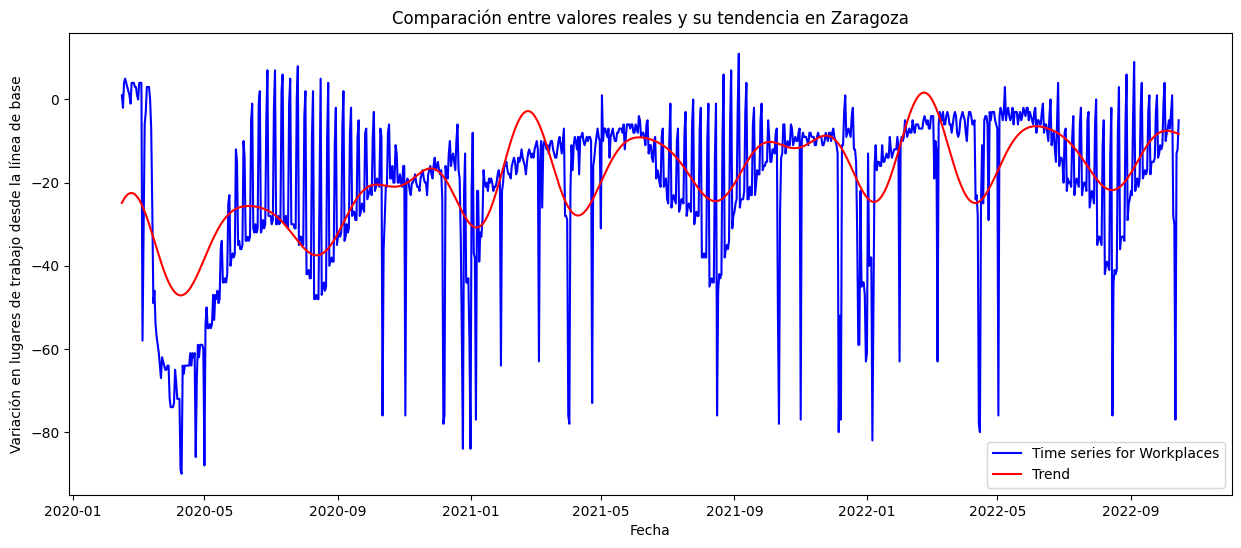

In [34]:
# Filtra los datos solo para la ciudad de 'Zaragoza'
zaragoza_data = data[data['Municipios'] == 'Zaragoza']

# Configura el tamaño del gráfico
plt.figure(figsize=(15, 6))

# # Grafica la serie temporal 'workplaces_percent_change_from_baseline' para Zaragoza
plt.plot(zaragoza_data['date'], zaragoza_data['workplaces_percent_change_from_baseline'], label='Time series for Workplaces', color='blue')

# Grafica la serie temporal 'trend' para Zaragoza
plt.plot(zaragoza_data['date'], zaragoza_data['trend_yearly'], label='Trend', color='red')

# Configura etiquetas y leyenda
plt.xlabel('Fecha')
plt.ylabel('Variación en lugares de trabajo desde la línea de base')
plt.title('Comparación entre valores reales y su tendencia en Zaragoza')
plt.legend()

# Muestra el gráfico
plt.show()


In [35]:
#Comenzamos análisis exxploratorio ))
print(data[data.date.duplicated()]['date'].count())
print('Fecha inicio del histórico: ', data.date.min())
print('Fecha fin del histórico: ', data.date.max())
print('Número total de días: ', data.date.nunique())

121737
Fecha inicio del histórico:  2020-02-15 00:00:00
Fecha fin del histórico:  2022-10-15 00:00:00
Número total de días:  974


In [41]:
# data = data[data['Población residente (Personas)'] > 200]

In [42]:
#Prueba pysyncon
municipios_control = valores_sin_zaragoza = [municipio for municipio in data['Municipios'].unique() if municipio != "Zaragoza"]

dataprep = Dataprep(
    foo=data,
    predictors=[
         'Edad mediana de la población (años)',
         'Número medio de hijos por mujer (Número)',
         'Población residente (Personas)',
         'Superficie total (Km2)',
         'Proporción de empleo en industria (NACE Rev.2 B-E) (Porcentaje)',
         'Proporción de empleo en servicios (NACE Rev.2 G-U) (Porcentaje)',
         'Proporción de extranjeros sobre la población total (Porcentaje)',
         'Proporción de población entre 25-64 años con máximo nivel educación ISCED 0, 1 ó 2 (Porcentaje)',
         'Proporción de población entre 25-64 años con máximo nivel de educación ISCED 3 ó 4 (Porcentaje)',
         'Proporción de población de 15-64 años (Porcentaje)',
         'Renta neta media anual por habitante (Euros)',
         'Tasa de desempleo (Porcentaje)',
    ],
    predictors_op="mean",
    time_predictors_prior=range(30, 75),
    special_predictors=[
        # ('Valor_Stringency', range(30,75), 'mean'),
        # ('Valor_GovernmentResponseIndex',  range(30,75), 'mean'), 
        # ('Valor_EconomicSupportIndex',  range(30,75), 'mean'),
        # ('Valor_Containment',  range(30,75), 'mean'),
    ],
    dependent="trend_yearly",
    unit_variable="Municipios",
    time_variable="Periodo",
    treatment_identifier='Zaragoza',
    controls_identifier=municipios_control,
    time_optimize_ssr=range(30, 127),
)

In [43]:
pen = PenalizedSynth()
pen.fit(dataprep, lambda_=0.01)

In [44]:

print(pen.weights())

Almería                   0.00
Algeciras                 0.00
Chiclana de la Frontera   0.00
Cádiz                     0.00
Jerez de la Frontera      0.00
                          ... 
Torrevieja                0.00
Gandia                    0.00
Paterna                   0.00
Torrent                   0.00
Ávila                     0.00
Name: weights, Length: 125, dtype: float64


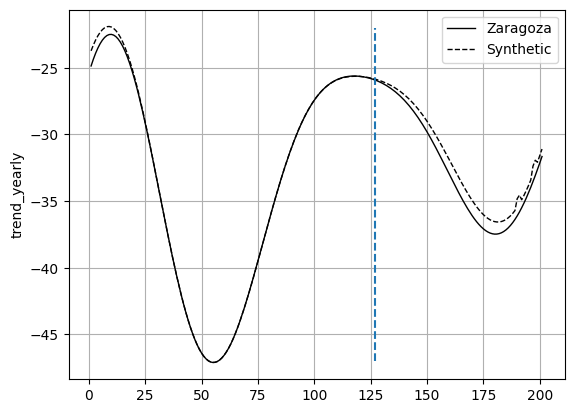

In [45]:
pen.path_plot(time_period=range(1, 202), treatment_time=127)

In [46]:
pen.summary()

c:\Users\34645\Desktop\Doctorado_II\Códigos_Python\miproyecto\Lib\site-packages\pysyncon\dataprep.py:236: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X1_special = pd.Series(X1_special, index=X0_special_columns).rename(


,treated,synthetic,sample mean
Edad mediana de la población (años),45.42,45.74,43.92
Número medio de hijos por mujer (Número),1.23,1.20,1.18
Población residente (Personas),681.88,143.01,184.05
Superficie total (Km2),972.27,124.45,4248.66
Proporción de empleo en industria (NACE Rev.2 B-E) (Porcentaje),10.26,14.93,9.07
Proporción de empleo en servicios (NACE Rev.2 G-U) (Porcentaje),83.31,78.16,82.26
Proporción de extranjeros sobre la población total (Porcentaje),11.79,9.03,11.07
"Proporción de población entre 25-64 años con máximo nivel educación ISCED 0, 1 ó 2 (Porcentaje)",30.07,28.23,36.04
Proporción de población entre 25-64 años con máximo nivel de educación ISCED 3 ó 4 (Porcentaje),22.80,22.72,22.62
Proporción de población de 15-64 años (Porcentaje),64.60,64.54,66.35


In [47]:
synth = Synth()
synth.fit(dataprep=dataprep, optim_method="Nelder-Mead", optim_initial="ols")

c:\Users\34645\Desktop\Doctorado_II\Códigos_Python\miproyecto\Lib\site-packages\pysyncon\dataprep.py:236: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X1_special = pd.Series(X1_special, index=X0_special_columns).rename(


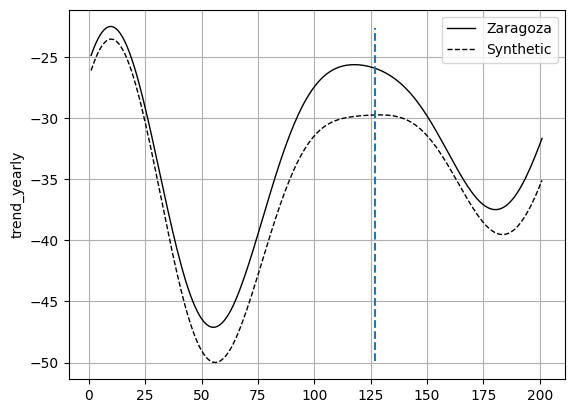

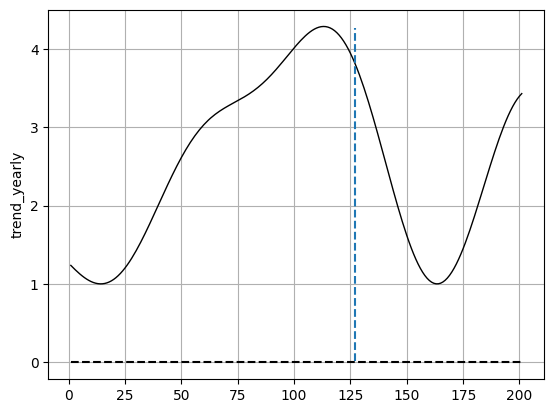

c:\Users\34645\Desktop\Doctorado_II\Códigos_Python\miproyecto\Lib\site-packages\pysyncon\dataprep.py:236: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X1_special = pd.Series(X1_special, index=X0_special_columns).rename(


Almería                   0.00
Algeciras                 0.00
Chiclana de la Frontera   0.00
Cádiz                     0.00
Jerez de la Frontera      0.00
                          ... 
Torrevieja                0.00
Gandia                    0.00
Paterna                   0.00
Torrent                   0.00
Ávila                     0.00
Name: weights, Length: 125, dtype: float64

In [48]:
synth.weights()
synth.path_plot(time_period=range(1, 202), treatment_time=127)
synth.gaps_plot(time_period=range(1, 202), treatment_time=127)
synth.summary()

synth.weights()

In [49]:
augsynth = AugSynth()
augsynth.fit(dataprep=dataprep)

c:\Users\34645\Desktop\Doctorado_II\Códigos_Python\miproyecto\Lib\site-packages\pysyncon\dataprep.py:236: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X1_special = pd.Series(X1_special, index=X0_special_columns).rename(


In [50]:
print(augsynth.weights())

Almería                    0.01
Algeciras                 -0.01
Chiclana de la Frontera   -0.01
Cádiz                     -0.00
Jerez de la Frontera       0.00
                           ... 
Torrevieja                -0.00
Gandia                     0.04
Paterna                    0.02
Torrent                    0.02
Ávila                      0.00
Name: weights, Length: 125, dtype: float64


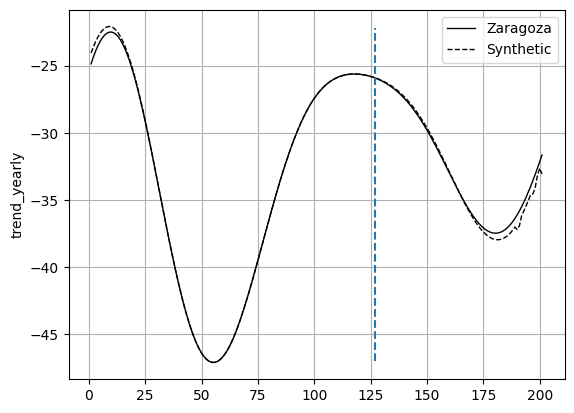

In [51]:
augsynth.path_plot(time_period=range(1, 202), treatment_time=127)

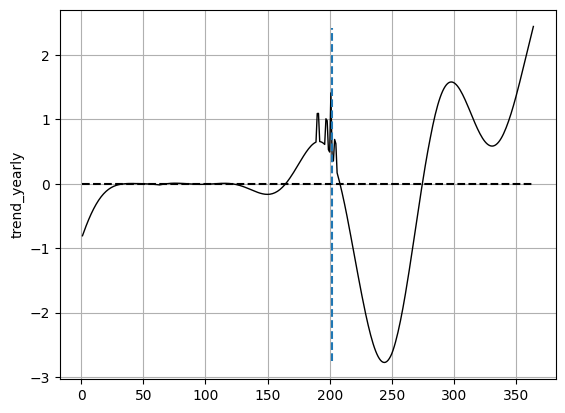

In [52]:
augsynth.gaps_plot(time_period=range(1, 365), treatment_time=202)

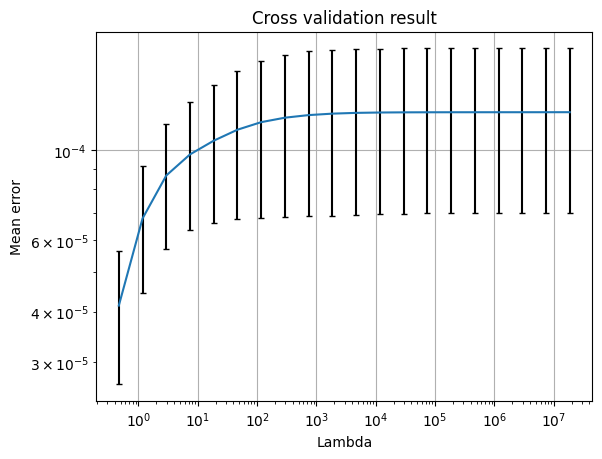

In [53]:
augsynth.cv_result.plot()

In [54]:
augsynth.summary()

c:\Users\34645\Desktop\Doctorado_II\Códigos_Python\miproyecto\Lib\site-packages\pysyncon\dataprep.py:236: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X1_special = pd.Series(X1_special, index=X0_special_columns).rename(


,treated,synthetic,sample mean
Edad mediana de la población (años),45.42,45.42,43.92
Número medio de hijos por mujer (Número),1.23,1.23,1.18
Población residente (Personas),681.88,681.80,184.05
Superficie total (Km2),972.27,972.37,4248.66
Proporción de empleo en industria (NACE Rev.2 B-E) (Porcentaje),10.26,10.26,9.07
Proporción de empleo en servicios (NACE Rev.2 G-U) (Porcentaje),83.31,83.31,82.26
Proporción de extranjeros sobre la población total (Porcentaje),11.79,11.79,11.07
"Proporción de población entre 25-64 años con máximo nivel educación ISCED 0, 1 ó 2 (Porcentaje)",30.07,30.07,36.04
Proporción de población entre 25-64 años con máximo nivel de educación ISCED 3 ó 4 (Porcentaje),22.80,22.80,22.62
Proporción de población de 15-64 años (Porcentaje),64.60,64.60,66.35
